# Data Set Split and Visualization

## Load Preprocessed Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/MyDrive/CSC413_Project/MFCC_augmented_last.zip"

Streaming output truncated to the last 5000 lines.
  inflating: content/MFCC_augmented/Red-breasted Nuthatch_159157_seg_58.wav+Marsh Wren_158917_seg_11.wav.png  
  inflating: content/MFCC_augmented/Song Sparrow_638590_seg_1.wav+Bewick's Wren_160282_seg_0.wav.png  
  inflating: content/MFCC_augmented/Spotted Towhee_160245_seg_29.wav+White-crowned Sparrow_184998_seg_10.wav.png  
  inflating: content/MFCC_augmented/Bewick's Wren_475742_seg_5.wav+Red-winged Blackbird_164257_seg_1.wav.png  
  inflating: content/MFCC_augmented/Marsh Wren_158917_seg_21.wav+White-crowned Sparrow_160176_seg_3.wav.png  
  inflating: content/MFCC_augmented/Song Sparrow_160160_seg_18.wav+Spotted Towhee_159636_seg_7.wav.png  
  inflating: content/MFCC_augmented/Bewick's Wren_164259_seg_2.wav+Song Sparrow_160162_seg_1.wav.png  
  inflating: content/MFCC_augmented/Red-winged Blackbird_183592_seg_57.wav+Bewick's Wren_159972_seg_1.wav.png  
  inflating: content/MFCC_augmented/Red-breasted Nuthatch_159329_seg_0.wav+Pine

In [ ]:
import os

In [ ]:
data_dir = "/content/content/MFCC_augmented"
img_files = []
labels = []
label_set = set()

for filename in os.listdir(data_dir):

    # Get the bird name labels
    if filename.endswith('.png'):
        parts = filename.split('_')
        bird1_name = parts[0]
        bird2_name = parts[3].split('+')[1]

        if bird1_name > bird2_name: # Order the labels alphabetically
            bird1_name, bird2_name = bird2_name, bird1_name

        img_files.append(filename)
        labels.append((bird1_name, bird2_name))
        label_set.update([(bird1_name, bird2_name)])

In [ ]:
print(len(img_files))
print(len(label_set))

22721
45


## Split into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

label_str = ['_'.join(label) for label in labels]

# Perform train-test split with a 80:20 ratio
train_files, test_files, train_labels, test_labels = train_test_split(
    img_files, label_str, test_size=0.2, stratify=label_str, random_state=42
)

In [ ]:
import zipfile
import csv

def save_datasets(train_files, train_labels, test_files, test_labels, zip_path):
    with zipfile.ZipFile(zip_path, 'w') as z:

        # Function to add files and labels to the zip under a specific directory
        def add_to_zip(file_list, label_list, directory_name):

            # Write images and labels to the zip file within a specified subdirectory
            for filename, label in zip(file_list, label_list):
                filepath = os.path.join(data_dir, filename)
                arcname = os.path.join(directory_name, filename)
                z.write(filepath, arcname=arcname)

            # Write labels CSV file in the subdirectory
            labels_csv_path = os.path.join(directory_name, f'{directory_name}.csv')
            with open('temp_labels.csv', 'w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(['filename', 'label1', 'label2'])
                for filename, label in zip(file_list, label_list):
                    writer.writerow([filename, label.split("_")[0], label.split("_")[1]])

            z.write('temp_labels.csv', arcname=labels_csv_path)
            os.remove('temp_labels.csv')

        # Add train and test datasets to the zip file
        add_to_zip(train_files, train_labels, 'train')
        add_to_zip(test_files, test_labels, 'test')

# Call the function with train and test data
zip_path = "/content/drive/MyDrive/CSC413_Project/MFCC_augmented_last_split.zip"
save_datasets(train_files, train_labels, test_files, test_labels, zip_path)

## Data Visualization

In [ ]:
!unzip dataset.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/Pine Siskin_160189_seg_38.wav+Marsh Wren_158975_seg_13.wav.png  
 extracting: train/Anna's Hummingbird_159875_seg_3.wav+Pine Siskin_159015_seg_41.wav.png  
 extracting: train/Red-breasted Nuthatch_159321_seg_74.wav+Golden-crowned Sparrow_159724_seg_69.wav.png  
 extracting: train/Bewick's Wren_159376_seg_3.wav+Pine Siskin_160113_seg_8.wav.png  
 extracting: train/Anna's Hummingbird_160046_seg_21.wav+Red-breasted Nuthatch_159329_seg_11.wav.png  
 extracting: train/Pine Siskin_159015_seg_41.wav+Red-breasted Nuthatch_159291_seg_8.wav.png  
 extracting: train/Spotted Towhee_160228_seg_1.wav+Marsh Wren_685677_seg_7.wav.png  
 extracting: train/Song Sparrow_661913_seg_8.wav+Red-winged Blackbird_160102_seg_1.wav.png  
 extracting: train/White-crowned Sparrow_558111_seg_15.wav+Red-breasted Nuthatch_159157_seg_70.wav.png  
 extracting: train/White-crowned Sparrow_160176_seg_28.wav+Spotted Towhee_661084_seg_7.wav.png  
 extrac

In [ ]:
import pandas as pd

df = pd.read_csv('/content/test/test.csv')
print(df.head())

                                            filename                  label1  \
0  Spotted Towhee_160245_seg_13.wav+Red-breasted ...   Red-breasted Nuthatch   
1  Red-breasted Nuthatch_210121_seg_64.wav+Bewick...           Bewick's Wren   
2  Red-breasted Nuthatch_159321_seg_97.wav+Golden...  Golden-crowned Sparrow   
3  Bewick's Wren_159933_seg_9.wav+Spotted Towhee_...           Bewick's Wren   
4  Song Sparrow_160160_seg_15.wav+Spotted Towhee_...            Song Sparrow   

                  label2  
0         Spotted Towhee  
1  Red-breasted Nuthatch  
2  Red-breasted Nuthatch  
3         Spotted Towhee  
4         Spotted Towhee  


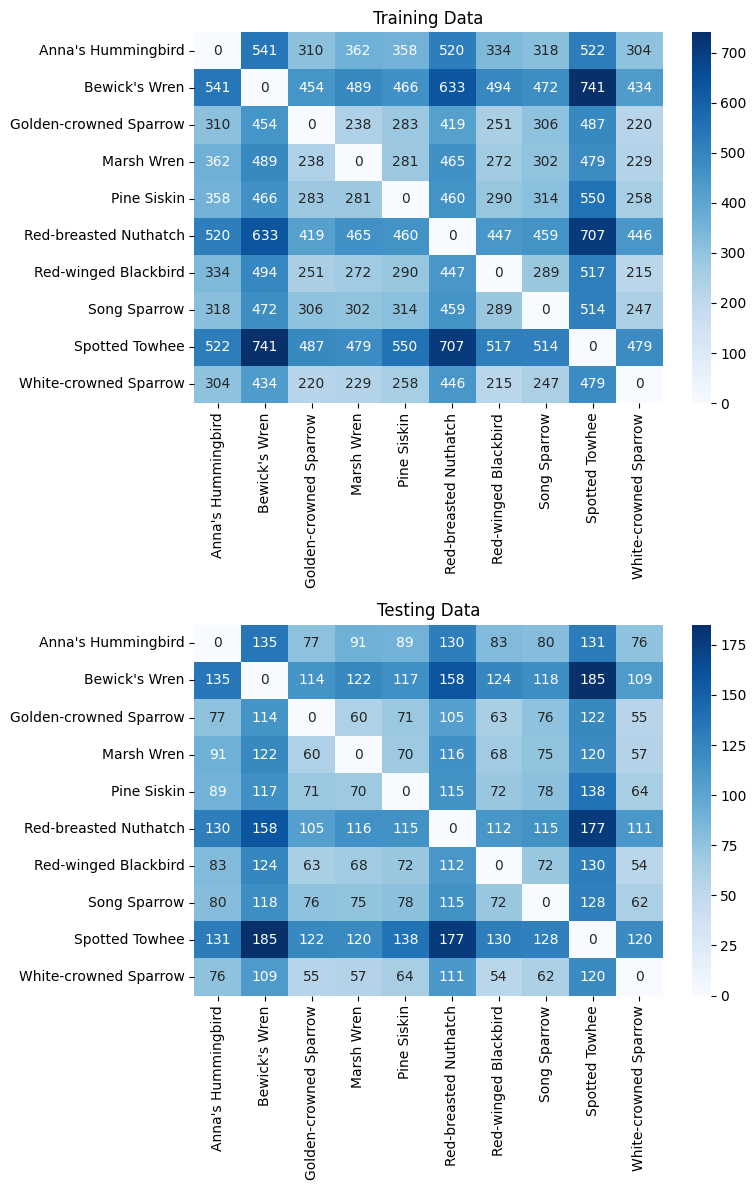

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Dataset
train_df = pd.read_csv('/content/train/train.csv')
test_df = pd.read_csv('/content/test/test.csv')

# Function to compute symmetric label combinations
def compute_symmetric_combinations(df):
    label_combinations = df.groupby(['label1', 'label2']).size().unstack(fill_value=0)
    label_combinations2 = df.groupby(['label2', 'label1']).size().unstack(fill_value=0)
    symmetric_label_combinations = label_combinations.add(label_combinations2, fill_value=0)
    symmetric_label_combinations = symmetric_label_combinations.fillna(0).astype(int)
    return symmetric_label_combinations

# Compute for both train and test datasets
train_combinations = compute_symmetric_combinations(train_df)
test_combinations = compute_symmetric_combinations(test_df)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# Train heatmap
sns.heatmap(train_combinations, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Data')
# axes[0].set_xlabel('Label2')
# axes[0].set_ylabel('Label1')

# Test heatmap
sns.heatmap(test_combinations, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Testing Data')
# axes[1].set_xlabel('Label2')
# axes[1].set_ylabel('Label1')

plt.tight_layout()
plt.savefig('/content/data_vertical.pdf', format='pdf', dpi=600)
plt.show()